In [1]:
import os
import glob

import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image, ImageFilter


from utils.jupyter_utils import ImageLinePlotter

%matplotlib inline

Using TensorFlow backend.


#  benign1.png
not found org_file :  ./VOC2012/JPEGImages/benign1.jpg


error: OpenCV(4.3.0) /Users/travis/build/skvark/opencv-python/opencv/modules/imgproc/src/color.cpp:182: error: (-215:Assertion failed) !_src.empty() in function 'cvtColor'


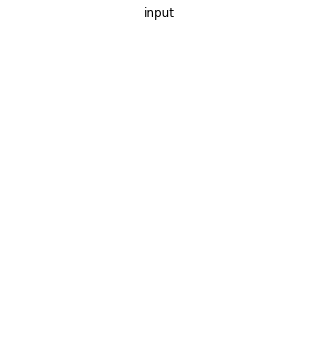

In [2]:
ORG_DIR = os.path.join('.', 'VOC2012', 'JPEGImages')
SEG_DIR = os.path.join('.', 'VOC2012', 'SegmentationClass')

segs = glob.glob(os.path.join(SEG_DIR, '*.png'))
segs.sort()

for seg_file in segs[:5]:
    print('# ', os.path.basename(seg_file))
    fname, _ = os.path.splitext(os.path.basename(seg_file))
    org_file = os.path.join(ORG_DIR, fname + '.jpg')
    if not os.path.exists(org_file):
         print('not found org_file : ', org_file)
    org_img = cv2.imread(org_file)
    seg_img_PIL = np.float32(np.array(Image.open(seg_file)))

    plotter = ImageLinePlotter(seg_file, plot_area_num=2)
    plotter.add_image(org_img, title='input')
    plotter.add_image(seg_img_PIL, title='mask (load with PIL)')
    plotter.show_plot()

In [ ]:
ORG_DIR = os.path.join('.', 'VOC2012', 'JPEGImages')
SEG_DIR = os.path.join('.', 'VOC2012', 'SegmentationClass')

segs = glob.glob(os.path.join(SEG_DIR, '*.png'))
segs.sort()

for seg_file in segs[:5]:
    print('# ', os.path.basename(seg_file))
    fname, _ = os.path.splitext(os.path.basename(seg_file))
    org_file = os.path.join(ORG_DIR, fname + '.jpg')
    if not os.path.exists(org_file):
        print('not found org_file : ', org_file)
    org_img = cv2.imread(org_file)
    seg_img_PIL = np.float32(np.array(Image.open(seg_file)))
    seg_img_cv2 = cv2.imread(seg_file)

    plotter = ImageLinePlotter(seg_file, plot_area_num=3)
    plotter.add_image(org_img, title='input')
    plotter.add_image(seg_img_PIL, title='mask (load with PIL)')
    plotter.add_image(seg_img_cv2, title='mask (load with cv2)')
    plotter.show_plot()
	

In [3]:
ORG_DIR = os.path.join('.', 'VOC2012', 'JPEGImages')
SEG_DIR = os.path.join('.', 'VOC2012', 'SegmentationClass')

segs = glob.glob(os.path.join(SEG_DIR, '*.png'))
segs.sort()

for seg_file in segs[:5]:
    print('# ', os.path.basename(seg_file))
    fname, _ = os.path.splitext(os.path.basename(seg_file))
    org_file = os.path.join(ORG_DIR, fname + '.jpg')
    if not os.path.exists(org_file):
        print('not found org_file : ', org_file)
    org_img = cv2.imread(org_file)
    seg_img_PIL = np.array(Image.open(seg_file))
    seg_img_cv2 = cv2.imread(seg_file)

    print('seg_img_PIL values : ', np.unique(seg_img_PIL))
    print('seg_img_cv2 values : ', np.unique(seg_img_cv2))

#  benign1.png
not found org_file :  ./VOC2012/JPEGImages/benign1.jpg
seg_img_PIL values :  [False  True]
seg_img_cv2 values :  [  0 255]
#  benign10.png
not found org_file :  ./VOC2012/JPEGImages/benign10.jpg
seg_img_PIL values :  [False  True]
seg_img_cv2 values :  [  0 255]
#  benign100.png
not found org_file :  ./VOC2012/JPEGImages/benign100.jpg
seg_img_PIL values :  [False  True]
seg_img_cv2 values :  [  0 255]
#  benign101.png
not found org_file :  ./VOC2012/JPEGImages/benign101.jpg
seg_img_PIL values :  [False  True]
seg_img_cv2 values :  [  0 255]
#  benign102.png
not found org_file :  ./VOC2012/JPEGImages/benign102.jpg
seg_img_PIL values :  [False  True]
seg_img_cv2 values :  [  0 255]


In [4]:
import shutil

TARGET_DIR = os.path.join('.', 'target_data')

ID_CANCER = 1

cls_counters = {}
for seg_file in segs:
    seg_img_PIL = np.array(Image.open(seg_file))

    copy_to = ''
    if np.any(seg_img_PIL == ID_CANCER):
         copy_to += 'cancer_'

    if copy_to == '':
        continue
    if not copy_to in cls_counters.keys():
            cls_counters[copy_to] = 0
    cls_counters[copy_to] += 1

    copy_path = os.path.join(TARGET_DIR, copy_to)
    if not os.path.exists(copy_path):
        os.makedirs(copy_path)
    shutil.copy(seg_file, copy_path)

print(cls_counters)

{'cancer_': 437}


In [6]:
chk_data = os.path.join('data', 'train', 'inputs','cancer_', 'malignant1.jpg')

img = Image.open(chk_data)

img_arr = np.array(img)
print('original unique : ', np.unique(img_arr))
print('---------------------------------------------------')

pil_resize = img.resize((1000, 1000))
pil_resize_arr = np.array(pil_resize)
print('PIL resized unique : ', np.unique(pil_resize_arr))
print('---------------------------------------------------')

cv2_resize = cv2.resize(img_arr, (1000, 1000))
print('cv2 resized unique : ', np.unique(cv2_resize))


FileNotFoundError: [Errno 2] No such file or directory: 'data/train/inputs/cancer_/malignant1.jpg'

In [3]:
!python train.py

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2022-01-04 18:08:02.427520: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-01-04 18:08:02.438458: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fdb4a757110 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-01-04 18:08:02.438510: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version

(Dimension(128), Dimension(128))
<train> Log :  data/train
<train> Log :  data/train/teachers
<train> Log :  train_generator.data_size() :  0
<train> Log :  valid_generator.data_size() :  0
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Traceback (most recent call last):
  File "train.py", line 63, in <module>
    callbacks=[tensorboard_callback]

#推論

In [5]:
!python train_with_checkpointcallback.py

Using TensorFlow backend.
Instructions for updating:
If using Keras pass *_constraint arguments to layers.
2022-01-05 12:52:14.443202: I tensorflow/core/platform/cpu_feature_guard.cc:142] Your CPU supports instructions that this TensorFlow binary was not compiled to use: AVX2 FMA
2022-01-05 12:52:14.453830: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7fdfd39a1ae0 initialized for platform Host (this does not guarantee that XLA will be used). Devices:
2022-01-05 12:52:14.453845: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): Host, Default Version

<train> Log :  train_generator.data_size() :  349
<train> Log :  valid_generator.data_size() :  88
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Epoch 1/150
6/6 [==============================] - 163s 27s/step - loss: 0.4326 - acc: 0.8438 - val_loss: 0.6932 - val_acc: 0.9471

Epoch 2/150
6/6 [==============================] - 155s 26s/step - l

6/6 [==============================] - 170s 28s/step - loss: 0.1266 - acc: 0.9570 - val_loss: 2.5649 - val_acc: 0.2957
Epoch 42/150
6/6 [==============================] - 171s 28s/step - loss: 0.1359 - acc: 0.9537 - val_loss: 0.9166 - val_acc: 0.5396
Epoch 43/150
6/6 [==============================] - 171s 28s/step - loss: 0.1231 - acc: 0.9581 - val_loss: 2.5039 - val_acc: 0.3046
Epoch 44/150
6/6 [==============================] - 171s 28s/step - loss: 0.1379 - acc: 0.9539 - val_loss: 0.8433 - val_acc: 0.5809
Epoch 45/150
6/6 [==============================] - 171s 28s/step - loss: 0.1232 - acc: 0.9580 - val_loss: 1.3294 - val_acc: 0.5427

Epoch 00045: val_loss did not improve from 0.58608
Epoch 46/150
6/6 [==============================] - 171s 28s/step - loss: 0.1331 - acc: 0.9549 - val_loss: 0.8395 - val_acc: 0.6136
Epoch 47/150
6/6 [==============================] - 174s 29s/step - loss: 0.1106 - acc: 0.9621 - val_loss: 1.0408 - val_acc: 0.5742
Epoch 48/150
6/6 [===================

In [3]:
RESULT_NAME_1 = 'results'

RESULT_TYPE_MASK = 'predict_outputs'
RESULT_TYPE_ARGMAX = 'argmax_outputs'
RESULT_TYPE_OVERLAY = 'overlay_outputs'

DATATYPE_TRAIN = 'train'
DATATYPE_VALID = 'valid'

def DATATYPE_PREDICTS(data_type):
    return data_type + '_predicts'

def DATATYPE_TEACHERS(data_type):
    return data_type + '_teachers'

IDX_CLASS_CANCER = 0
IDXES = [IDX_CLASS_CANCER]

def RESULTS_DIR(result_name, data_type, result_type):
    return os.path.join(result_name, data_type, result_type)


def eval_iou(result_name, data_type):
    pred_mask_dir = RESULTS_DIR(result_name, DATATYPE_PREDICTS(data_type), RESULT_TYPE_MASK)
    teacher_mask_dir = RESULTS_DIR(result_name, DATATYPE_TEACHERS(data_type), RESULT_TYPE_MASK)
    if not os.path.exists(teacher_mask_dir):
        print('teachers dir is not found. : ', teacher_mask_dir)
        return False

    print('target pred dir : ', pred_mask_dir)

    pred_mask_files = glob.glob(os.path.join(pred_mask_dir, '*.png'))
    pred_mask_files.sort()

    all_ious = {}
    for target_idx in IDXES:
        all_ious[target_idx] = []

    if len(pred_mask_files) < 1:
        print('pred_mask_files is []')

    for p_mask_file in pred_mask_files:
        fname = os.path.basename(p_mask_file)
        t_mask_file = os.path.join(teacher_mask_dir, fname)
        if not os.path.exists(t_mask_file):
            print('teacher mask is not found.')
            continue

        p_masks = cv2.imread(p_mask_file)
        t_masks = cv2.imread(t_mask_file)

        iou_print = ','
        for target_idx in IDXES:
            p_mask = p_masks[:, :, target_idx]
            t_mask = t_masks[:, :, target_idx]
            iou = calculate_iou(p_mask, t_mask)
            iou_print += '%.3f, ' % iou
            if np.isnan(iou):
                continue
            all_ious[target_idx].append(iou)

        print(fname, iou_print)

    mean_iou_print = 'mean:'
    for target_idx in IDXES:
        mean_iou = np.average(np.array(all_ious[target_idx]))
        mean_iou_print += '%.3f, ' % mean_iou
    print('')
    print(mean_iou_print)


def calculate_iou(p_mask, t_mask):
    p_mask = to_binary(p_mask)
    t_mask = to_binary(t_mask)

    if np.sum(t_mask) == 0:
        return np.nan

    overlap = np.sum(p_mask * t_mask)
    union = np.sum(to_binary(p_mask + t_mask))

    return overlap / union


def to_binary(mask, val=1):
    mask[mask > 0] = val
    return mask
	


In [4]:
eval_iou(RESULT_NAME_1, DATATYPE_VALID)

target pred dir :  results/valid_predicts/predict_outputs
malignant10.png ,0.397, 
malignant104.png ,0.001, 
malignant106.png ,0.000, 
malignant117.png ,0.163, 
malignant120.png ,0.135, 
malignant123.png ,0.028, 
malignant128.png ,0.159, 
malignant13.png ,0.000, 
malignant137.png ,0.000, 
malignant140.png ,0.032, 
malignant150.png ,0.170, 
malignant160.png ,0.000, 
malignant169.png ,0.116, 
malignant173.png ,0.000, 
malignant18.png ,0.000, 
malignant187.png ,0.007, 
malignant19.png ,0.011, 
malignant192.png ,0.000, 
malignant199.png ,0.020, 
malignant204.png ,0.078, 
malignant208.png ,0.000, 
malignant26.png ,0.669, 
malignant29.png ,0.075, 
malignant32.png ,0.000, 
malignant35.png ,0.009, 
malignant39.png ,0.000, 
malignant4.png ,0.293, 
malignant44.png ,0.550, 
malignant48.png ,0.790, 
malignant51.png ,0.167, 
malignant59.png ,0.004, 
malignant61.png ,0.367, 
malignant63.png ,0.037, 
malignant67.png ,0.000, 
malignant69.png ,0.000, 
malignant72.png ,0.000, 
malignant83.png ,0.130, 
m

In [2]:
from enum import Enum

EVAL_EXCESS_DIR = 'eval_excess'
EVAL_DEFICIENCY_DIR = 'eval_deficiency'
EVAL_EXCESS_AND_DEFICIENCY_DIR = 'eval_excess_and_deficiency'

CLASS_NAME_CANCER = 'CANCER'
CLASS_NAMES = [CLASS_NAME_CANCER]


class OutputType(Enum):
    TEXT = 0
    IMAGE = 1
    BOTH = 2


def prepare_dir(dir_path):
    if not os.path.exists(dir_path):
        os.makedirs(dir_path)
    return dir_path


def eval_excesses_and_deficiencies(result_name, data_type,output_type=OutputType.TEXT, with_save=False):
    pred_mask_dir = RESULTS_DIR(result_name, DATATYPE_PREDICTS(data_type), RESULT_TYPE_MASK)
    teacher_mask_dir = RESULTS_DIR(result_name, DATATYPE_TEACHERS(data_type), RESULT_TYPE_MASK)

    print('target pred dir : ', pred_mask_dir)

    pred_mask_files = glob.glob(os.path.join(pred_mask_dir, '*.png'))
    pred_mask_files.sort()

    all_excesses = {}
    all_deficiencies = {}
    all_deficiencies_to_teacher = {}
    count_teachers = {}

    for target_idx in IDXES:
        all_excesses[target_idx] = []
        all_deficiencies[target_idx] = []
        all_deficiencies_to_teacher[target_idx] = []
        count_teachers[target_idx] = 0


    if len(pred_mask_files) < 1:
        print('pred_mask_files is []')

    for k, p_mask_file in enumerate(pred_mask_files):
        fname = os.path.basename(p_mask_file)
        t_mask_file = os.path.join(teacher_mask_dir, fname)
        if not os.path.exists(t_mask_file):
            print('teacher mask is not found.')
            continue

        p_masks = cv2.imread(p_mask_file)
        t_masks = cv2.imread(t_mask_file)

#         save_base_dir = RESULTS_DIR(result_name, model_type, data_type, '')
        save_base_dir = "results"
        eval_excess_and_deficiency(fname, p_masks, t_masks, all_excesses, all_deficiencies,
                    all_deficiencies_to_teacher, count_teachers,
                    output_type=output_type, with_save=with_save, save_base_dir=save_base_dir)

    if output_type == OutputType.TEXT or output_type == OutputType.BOTH:
        mean_excesses_print = ':'
        mean_deficiencies_print = ':'
        mean_deficiencies_to_teacher_print = ':'
        excesses_rate_print = ':'
        deficiencies_rate_print = ':'
        deficiencies_to_teacher_rate_print = ':'
        for target_idx in IDXES:
            mean_excesses = np.average(np.array(all_excesses[target_idx]))
            mean_deficiencies = np.average(np.array(all_deficiencies[target_idx]))
            mean_deficiencies_to_teacher = np.average(np.array(all_deficiencies_to_teacher[target_idx]))
            mean_excesses_print += '%.3f, ' % mean_excesses
            mean_deficiencies_print += '%.3f, ' % mean_deficiencies
            mean_deficiencies_to_teacher_print += '%.3f, ' % mean_deficiencies_to_teacher
            excesses_rate_print += '%.3f, ' % (len(all_excesses[target_idx]) / len(pred_mask_files))
            deficiencies_rate_print += '%.3f, ' % (len(all_deficiencies[target_idx]) / len(pred_mask_files))
            deficiencies_to_teacher_rate = 0
            if count_teachers[target_idx] != 0:
                deficiencies_to_teacher_rate = len(all_deficiencies[target_idx]) / count_teachers[target_idx]
            deficiencies_to_teacher_rate_print += '%.3f, ' % deficiencies_to_teacher_rate
        print('')
        print('rate:', excesses_rate_print, deficiencies_rate_print)
        print('mean:', mean_excesses_print, mean_deficiencies_print, mean_deficiencies_to_teacher_print)


def eval_excess_and_deficiency(fname, p_masks, t_masks, all_excesses, all_deficiencies,
                            all_deficiencies_to_teacher, count_teachers,
                            output_type=OutputType.TEXT, with_save=False, save_base_dir=''):
    img_h, img_w = np.shape(p_masks)[:2]
    img_size = img_h * img_w

    excesses_print = ','
    deficiencies_print = ','
    deficiencies_to_teacher_print = ','
    image_plotter = ImageLinePlotter(plot_area_num=len(IDXES))
    for target_idx, cname in zip(IDXES, CLASS_NAMES):
        p_mask = to_binary(p_masks[:, :, target_idx])
        t_mask = to_binary(t_masks[:, :, target_idx])
        e_mask, d_mask, o_mask = make_excess_and_deficiency(p_mask, t_mask)
        excesses = np.sum(e_mask) / img_size
        deficiencies = np.sum(d_mask) / img_size
        if np.sum(t_mask) != 0:
            count_teachers[target_idx] += 1
            deficiencies_to_teacher = np.sum(d_mask) / np.sum(t_mask)
        else:
            deficiencies_to_teacher = 0
        excesses_print += '%.3f, ' % excesses
        deficiencies_print += '%.3f, ' % deficiencies
        deficiencies_to_teacher_print += '%.3f, ' % deficiencies_to_teacher
        if excesses != 0:
            all_excesses[target_idx].append(excesses)
        if deficiencies != 0:
            all_deficiencies[target_idx].append(deficiencies)
        if deficiencies_to_teacher != 0:
            all_deficiencies_to_teacher[target_idx].append(deficiencies_to_teacher)
        dummy_mask = np.zeros(np.shape(p_mask)[:2], dtype=np.uint8)
        eval_img = np.stack([d_mask * 255, o_mask * 120, e_mask * 255], axis=2)
        eval_img = eval_img.astype(np.uint8)
        image_plotter.add_image(eval_img, title=cname)
        if with_save:
            e_img = np.stack([dummy_mask, dummy_mask, e_mask * 255], axis=2)
            d_img = np.stack([d_mask * 255, dummy_mask, dummy_mask], axis=2)
            save_excess_dir = prepare_dir(os.path.join(save_base_dir, EVAL_EXCESS_DIR))
            save_deficiency_dir = prepare_dir(os.path.join(save_base_dir, EVAL_DEFICIENCY_DIR))
            save_excess_and_deficiency_dir = prepare_dir(os.path.join(save_base_dir, EVAL_EXCESS_AND_DEFICIENCY_DIR))
            cv2.imwrite(os.path.join(save_excess_dir, fname), e_img)
            cv2.imwrite(os.path.join(save_deficiency_dir, fname), d_img)
            cv2.imwrite(os.path.join(save_excess_and_deficiency_dir, fname), eval_img)

    if output_type == OutputType.TEXT or output_type == OutputType.BOTH:
        print(fname, excesses_print, deficiencies_print, deficiencies_to_teacher_print)
    else:
        print(fname)

    if output_type == OutputType.IMAGE or output_type == OutputType.BOTH:
        image_plotter.show_plot()

    return all_excesses, all_deficiencies, all_deficiencies_to_teacher, count_teachers


def make_excess_and_deficiency(p_mask, t_mask):
    e_mask = (p_mask - t_mask).astype(np.int8)
    e_mask[e_mask < 0] = 0
    e_mask = e_mask.astype(np.uint8)

    d_mask = (t_mask - p_mask).astype(np.int8)
    d_mask[d_mask < 0] = 0
    d_mask = d_mask.astype(np.uint8)

    o_mask = p_mask * t_mask

    return e_mask, d_mask, o_mask


In [3]:
eval_excesses_and_deficiencies(RESULT_NAME_1, DATATYPE_VALID, output_type=OutputType.TEXT)

NameError: name 'RESULT_NAME_1' is not defined

target pred dir :  results/valid_predicts/predict_outputs
malignant10.png


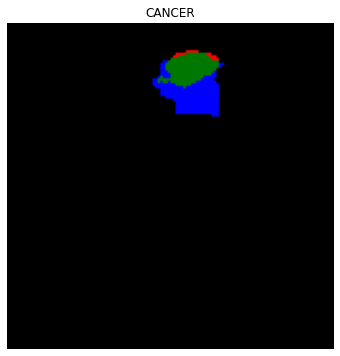

malignant104.png


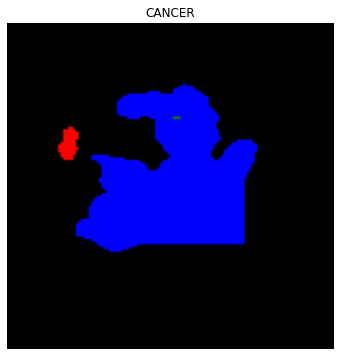

malignant106.png


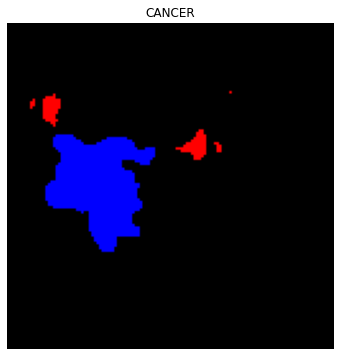

malignant117.png


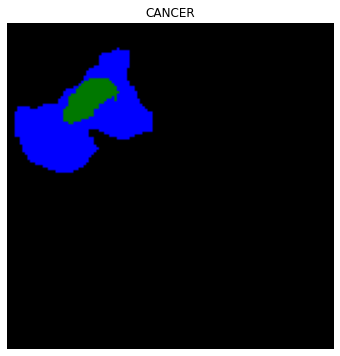

malignant120.png


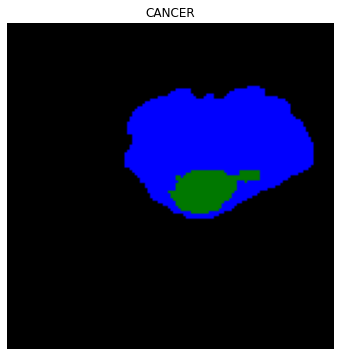

malignant123.png


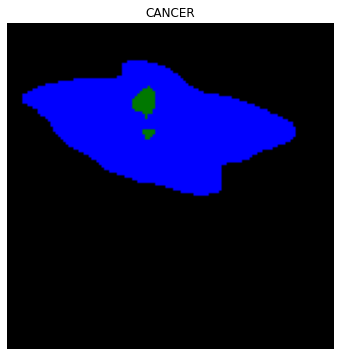

malignant128.png


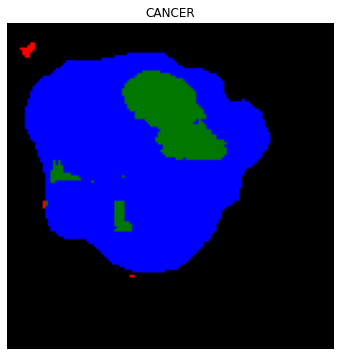

malignant13.png


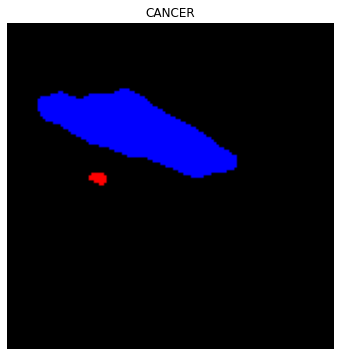

malignant137.png


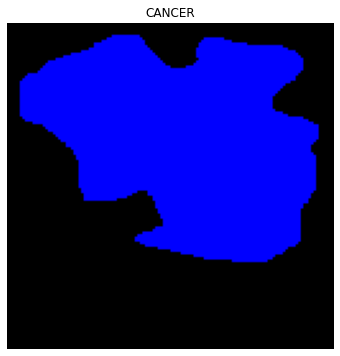

malignant140.png


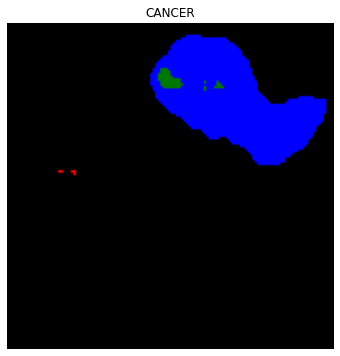

malignant150.png


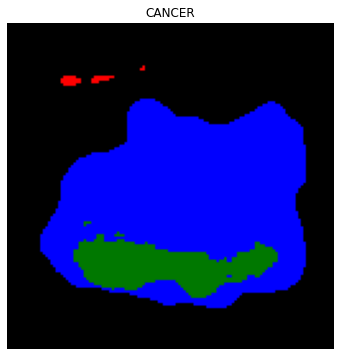

malignant160.png


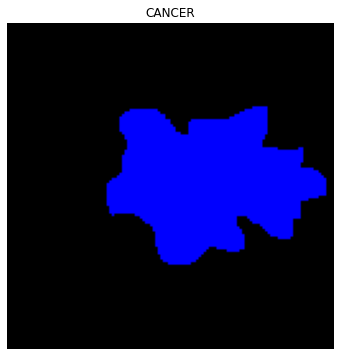

malignant169.png


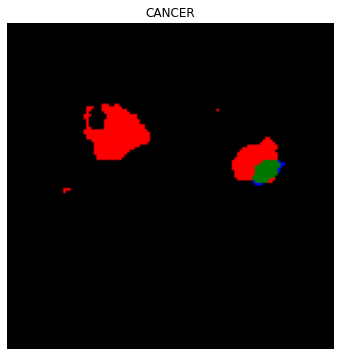

malignant173.png


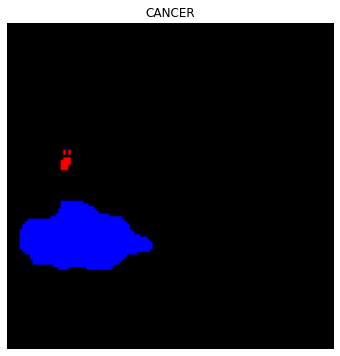

malignant18.png


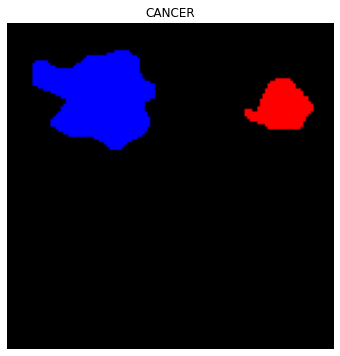

malignant187.png


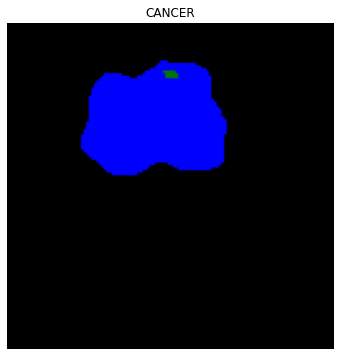

malignant19.png


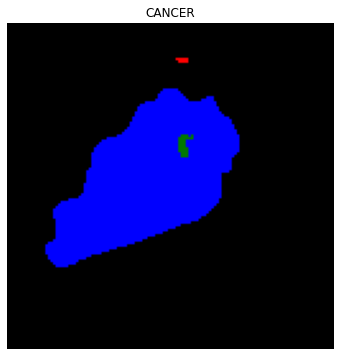

malignant192.png


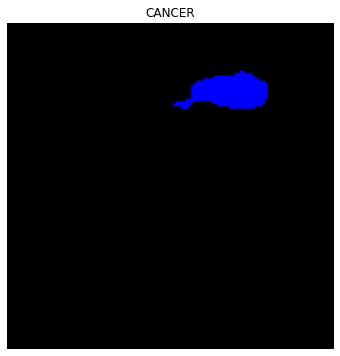

malignant199.png


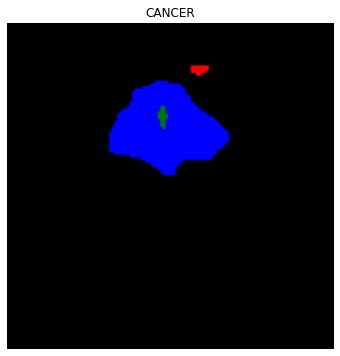

malignant204.png


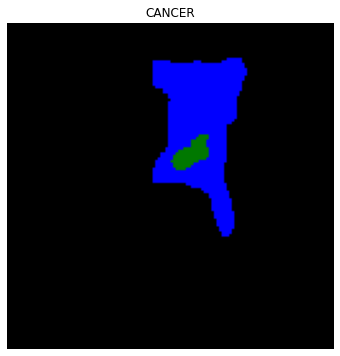

malignant208.png


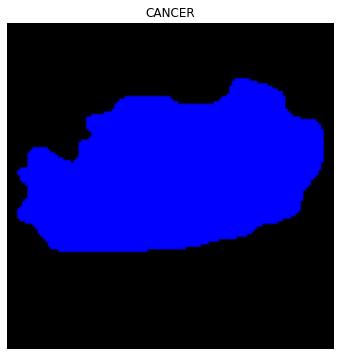

malignant26.png


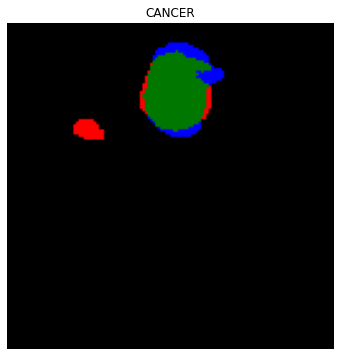

malignant29.png


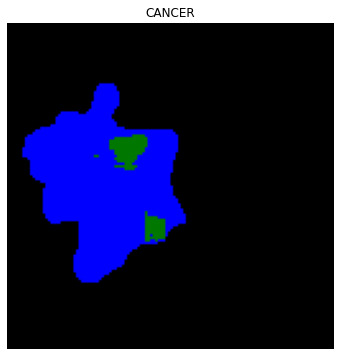

malignant32.png


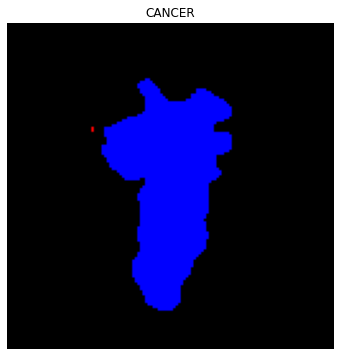

malignant35.png


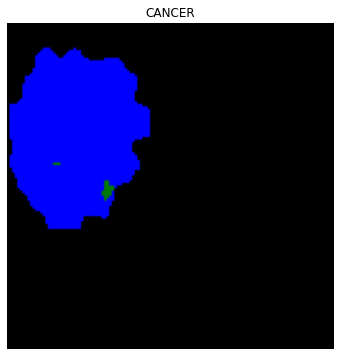

malignant39.png


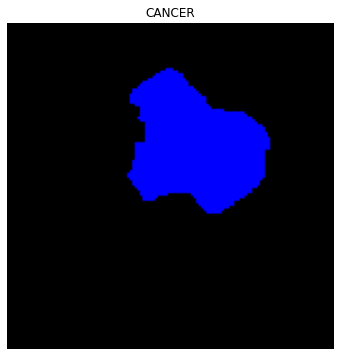

malignant4.png


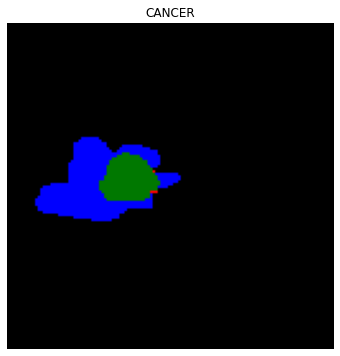

malignant44.png


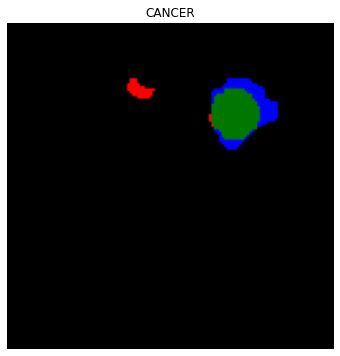

malignant48.png


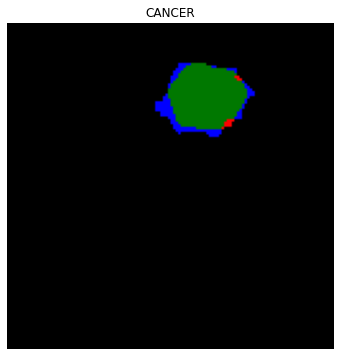

malignant51.png


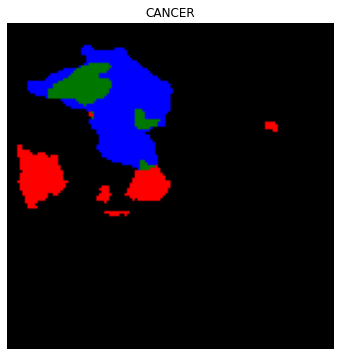

malignant59.png


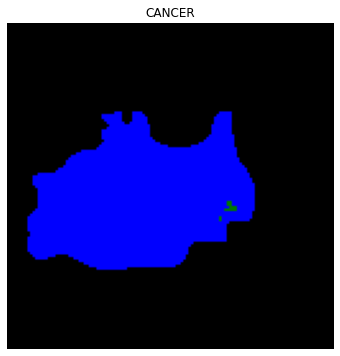

malignant61.png


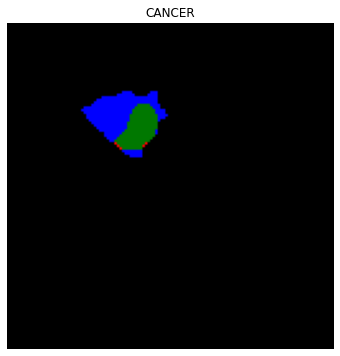

malignant63.png


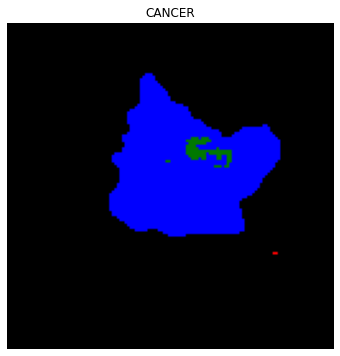

malignant67.png


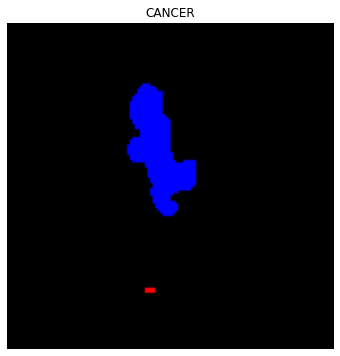

malignant69.png


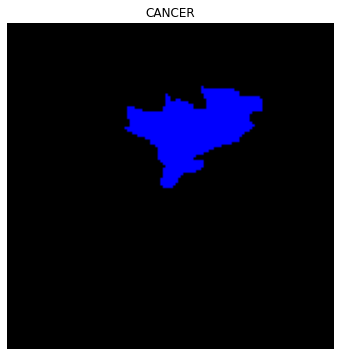

malignant72.png


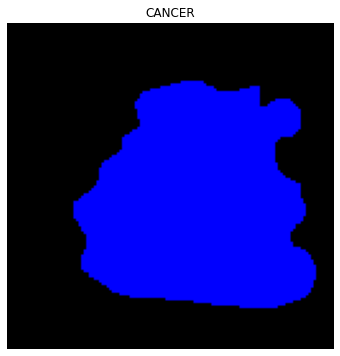

malignant83.png


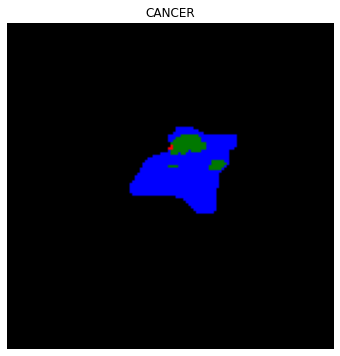

malignant86.png


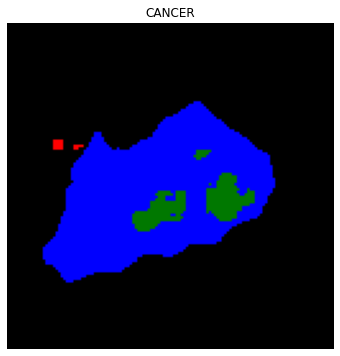

malignant88.png


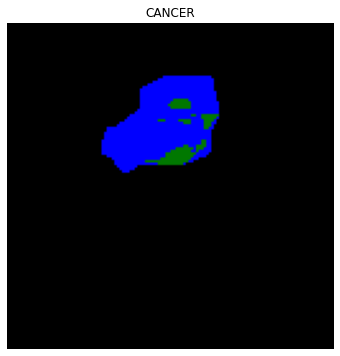

malignant89.png


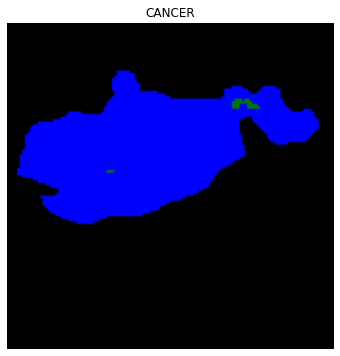

malignant9.png


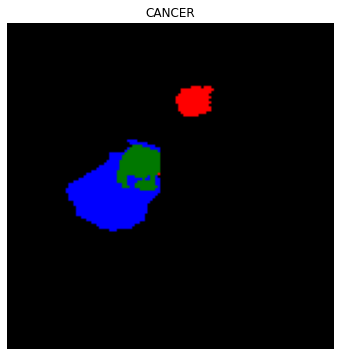

malignant99.png


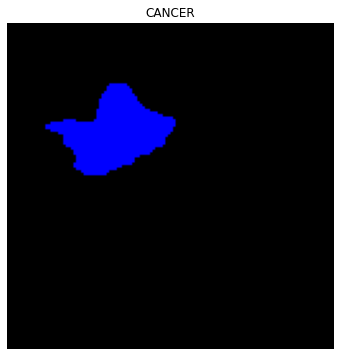

In [9]:
eval_excesses_and_deficiencies(RESULT_NAME_1, DATATYPE_VALID, output_type=OutputType.IMAGE)

arearatioの計算

In [ ]:
丸い形のものはしっかり捉えられている？？
例えば、26, 48, 44, 61などは比較的高数字を叩き出している。

LossFunctionの関数の説明

ヒストグラムはパワポに関して